In [ ]:
# basic stuff 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# from google.colab import files
import os
import sklearn
import time
import math
import itertools

# torch stuff
import torch
from torch import nn
import torch.nn.functional as F

# !pip install mat73
# import mat73

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/PopFRData/')
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/xds_python/')
sys.path.append('/content/drive/MyDrive/Miller_Lab/FIU/custom_functions/')

from xds import lab_data
import joint_angles
import data_loading
import train_test
import r2_pr2
import pr2
import models
from models import TempConvNet, FCNet
import visualization

Load datasets

In [ ]:
dataset_dict = data_loading.load_datasets('/content/drive/My Drive/Miller_Lab/FIU/PopFRData/processed_shuffled_opensim_datasets/')
loader_dict = data_loading.get_loaders(dataset_dict, 32)
tcnn_dataset_dict = data_loading.load_datasets('/content/drive/My Drive/Miller_Lab/FIU/PopFRData/tcnn_processed_shuffled_opensim_datasets/')
tcnn_loader_dict = data_loading.get_loaders(tcnn_dataset_dict, 32)

Load MLPs

In [ ]:
mlp_3layers_addedrelu_0309 = models.FCNet(24, dataset_dict['20220309']['Joint Angles']['Full'].num_neural_units, 3, 112, add_relu = True)
mlp_3layers_addedrelu_0309.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/MLP/Pop_FR_OpenSIM/MLP_20220309_Joint Angles_3_layers_reluadded'))
mlp_3layers_addedrelu_0712 = models.FCNet(24, dataset_dict['20210712']['Joint Angles']['Full'].num_neural_units, 3, 112, add_relu = True)
mlp_3layers_addedrelu_0712.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/MLP/Pop_FR_OpenSIM/MLP_20210712_Joint Angles_3_layers_reluadded'))
mlp_3layers_addedrelu_1108 = models.FCNet(24, dataset_dict['20211108']['Joint Angles']['Full'].num_neural_units, 3, 112, add_relu = True)
mlp_3layers_addedrelu_1108.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/MLP/Pop_FR_OpenSIM/MLP_20211108_Joint Angles_3_layers_reluadded'))

<All keys matched successfully>

Load TCNs

In [ ]:
cnn_4convlayers_add_relu_0309 = models.TempConvNet(24, dataset_dict ['20220309']['Joint Angles']['Full'].num_neural_units, 4, 1, 5, 2, add_relu = True, causal=False)
cnn_4convlayers_add_relu_0309.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/TempCNN_20220309_Joint Angles_4_convlayers_reluadded'))
cnn_4convlayers_add_relu_0712 = models.TempConvNet(24, dataset_dict['20210712']['Joint Angles']['Full'].num_neural_units, 4, 1, 5, 2, add_relu = True, causal=False)
cnn_4convlayers_add_relu_0712.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/TempCNN_20210712_Joint Angles_4_convlayers_reluadded'))
cnn_4convlayers_add_relu_1108 = models.TempConvNet(24, dataset_dict['20211108']['Joint Angles']['Full'].num_neural_units, 4, 1, 5, 2, add_relu = True, causal=False)
cnn_4convlayers_add_relu_1108.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/Standard/TempCNN_20211108_Joint Angles_4_convlayers_reluadded'))

<All keys matched successfully>

## Plotting distributions

In [ ]:
models_dict = {'MLP':{'20220309':mlp_3layers_addedrelu_0309, '20210712':mlp_3layers_addedrelu_0712,'20211108':mlp_3layers_addedrelu_1108},'TCN':{'20220309':cnn_4convlayers_add_relu_0309, '20210712':cnn_4convlayers_add_relu_0712,'20211108':cnn_4convlayers_add_relu_1108}}

In [ ]:
all_dataset_permutations = list(itertools.permutations(['20220309', '20210712', '20211108']))

In [ ]:
all_dataset_permutations

[('20220309', '20210712', '20211108'),
 ('20220309', '20211108', '20210712'),
 ('20210712', '20220309', '20211108'),
 ('20210712', '20211108', '20220309'),
 ('20211108', '20220309', '20210712'),
 ('20211108', '20210712', '20220309')]

In [ ]:
for date in tcnn_dataset_dict.keys():
    print(tcnn_dataset_dict[date]['Joint Angles']['Full'].num_neural_units)

96
142
93


In [ ]:
all_dataset_permutations[0]

('20220309', '20210712', '20211108')

Date: 20220309, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.001000, Train Loss: 409.816968, Test Loss: 184.178139. Train R2: -0.6708399, Test R2: -0.7937572, Train pR2: -3.0153904, Test pR2: -3.1118977
Epoch: 050, LR: 0.001000, Train Loss: 64.452650, Test Loss: 67.945068. Train R2: 0.4074580, Test R2: 0.2870225, Train pR2: -0.8208504, Test pR2: -0.8405579
Epoch: 100, LR: 0.000512, Train Loss: 57.778228, Test Loss: 64.532299. Train R2: 0.4751830, Test R2: 0.3223647, Train pR2: -0.7755495, Test pR2: -0.8233171
Epoch: 150, LR: 0.000168, Train Loss: 54.257121, Test Loss: 62.909176. Train R2: 0.5068370, Test R2: 0.3332586, Train pR2: -0.7611398, Test pR2: -0.8340546
Epoch: 200, LR: 0.000044, Train Loss: 53.438031, Test Loss: 62.818531. Train R2: 0.5138100, Test R2: 0.3329287, Train pR2: -0.7584183, Test pR2: -0.8384647
Epoch: 250, LR: 0.000014, Train Loss: 53.178111, Test Loss: 62.763973. Train R2: 0.5160183, Test R2: 0.3331705, Train pR2: -0.7576907, T

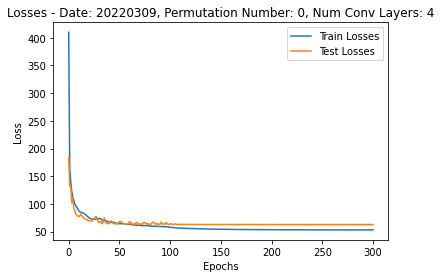

Date: 20210712, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.001000, Train Loss: 311.621365, Test Loss: 226.540054. Train R2: -0.5019719, Test R2: -0.5584840, Train pR2: -9.8857422, Test pR2: -10.3713551
Epoch: 050, LR: 0.000800, Train Loss: 89.408057, Test Loss: 94.674670. Train R2: 0.4229314, Test R2: 0.3636674, Train pR2: -1.9504631, Test pR2: -2.0566845
Epoch: 100, LR: 0.000640, Train Loss: 74.196874, Test Loss: 89.193232. Train R2: 0.5099494, Test R2: 0.3993551, Train pR2: -1.6094966, Test pR2: -1.7692708
Epoch: 150, LR: 0.000168, Train Loss: 70.823730, Test Loss: 89.495158. Train R2: 0.5343695, Test R2: 0.3973819, Train pR2: -1.4851478, Test pR2: -1.6792433
Epoch: 200, LR: 0.000055, Train Loss: 69.115112, Test Loss: 89.944059. Train R2: 0.5417247, Test R2: 0.3940630, Train pR2: -1.4756955, Test pR2: -1.6763376
Epoch: 250, LR: 0.000014, Train Loss: 68.783669, Test Loss: 90.065948. Train R2: 0.5436889, Test R2: 0.3931189, Train pR2: -1.4742100, 

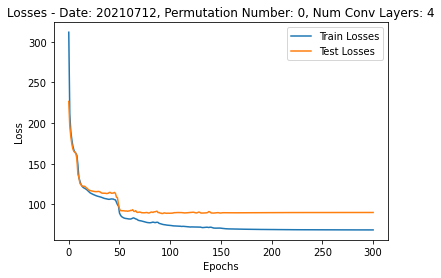

Date: 20211108, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.001000, Train Loss: 408.738910, Test Loss: 292.841583. Train R2: -0.9003127, Test R2: -0.9793785, Train pR2: -8.5893669, Test pR2: -9.1302671
Epoch: 050, LR: 0.000512, Train Loss: 81.806200, Test Loss: 135.641327. Train R2: 0.4868703, Test R2: 0.1121926, Train pR2: -1.0543408, Test pR2: -1.4312571
Epoch: 100, LR: 0.000134, Train Loss: 69.223667, Test Loss: 142.376671. Train R2: 0.5608341, Test R2: 0.0746315, Train pR2: -0.9838606, Test pR2: -1.5804094
Epoch: 150, LR: 0.000044, Train Loss: 65.844334, Test Loss: 144.866051. Train R2: 0.5809660, Test R2: 0.0605466, Train pR2: -0.9878020, Test pR2: -1.6476802
Epoch: 200, LR: 0.000012, Train Loss: 64.841198, Test Loss: 145.506027. Train R2: 0.5869175, Test R2: 0.0563347, Train pR2: -0.9895198, Test pR2: -1.6689340
Epoch: 250, LR: 0.000004, Train Loss: 64.539263, Test Loss: 145.716583. Train R2: 0.5887176, Test R2: 0.0549771, Train pR2: -0.99023

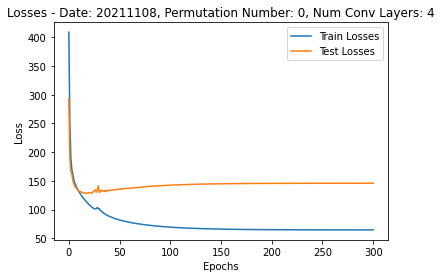

Date: 20220309, Initial LR: 0.0007 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000700, Train Loss: 242.556219, Test Loss: 146.357254. Train R2: -0.4364235, Test R2: -0.4473068, Train pR2: -5.9435897, Test pR2: -6.2181740
Epoch: 050, LR: 0.000560, Train Loss: 53.676734, Test Loss: 62.582071. Train R2: 0.5136066, Test R2: 0.3345925, Train pR2: -0.2954603, Test pR2: -0.4196776
Epoch: 100, LR: 0.000184, Train Loss: 48.245773, Test Loss: 62.136734. Train R2: 0.5564946, Test R2: 0.3358987, Train pR2: -0.2569731, Test pR2: -0.4431892
Epoch: 150, LR: 0.000060, Train Loss: 46.903539, Test Loss: 62.289824. Train R2: 0.5678584, Test R2: 0.3321041, Train pR2: -0.2497700, Test pR2: -0.4536111
Epoch: 200, LR: 0.000016, Train Loss: 46.497531, Test Loss: 62.350471. Train R2: 0.5712582, Test R2: 0.3309776, Train pR2: -0.2479771, Test pR2: -0.4568909
Epoch: 250, LR: 0.000004, Train Loss: 46.370143, Test Loss: 62.371777. Train R2: 0.5723246, Test R2: 0.3306084, Train pR2: -0.2475373, 

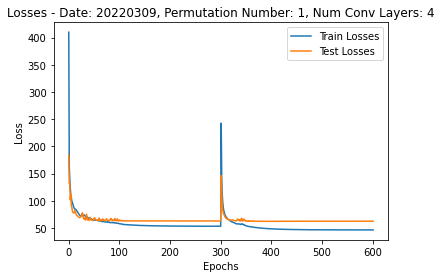

Date: 20211108, Initial LR: 0.0007 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000700, Train Loss: 180.638184, Test Loss: 160.390999. Train R2: 0.1591940, Test R2: -0.0765284, Train pR2: -2.6430278, Test pR2: -2.9724088
Epoch: 050, LR: 0.000358, Train Loss: 55.708630, Test Loss: 147.296349. Train R2: 0.6438189, Test R2: 0.0280099, Train pR2: -0.7060940, Test pR2: -1.5933572
Epoch: 100, LR: 0.000117, Train Loss: 50.598428, Test Loss: 153.226562. Train R2: 0.6746078, Test R2: -0.0092338, Train pR2: -0.7082330, Test pR2: -1.7744302
Epoch: 150, LR: 0.000031, Train Loss: 49.058614, Test Loss: 155.512054. Train R2: 0.6839198, Test R2: -0.0231863, Train pR2: -0.7104854, Test pR2: -1.8350542
Epoch: 200, LR: 0.000010, Train Loss: 48.578699, Test Loss: 156.334801. Train R2: 0.6868418, Test R2: -0.0278750, Train pR2: -0.7112427, Test pR2: -1.8571512
Epoch: 250, LR: 0.000003, Train Loss: 48.427774, Test Loss: 156.568260. Train R2: 0.6877546, Test R2: -0.0293415, Train pR2: -0.7

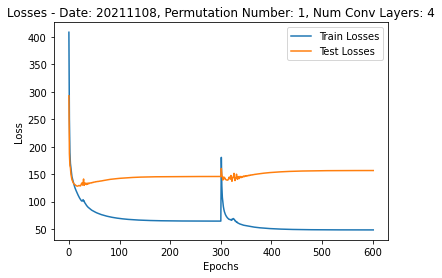

Date: 20210712, Initial LR: 0.0007 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000700, Train Loss: 245.009652, Test Loss: 163.931681. Train R2: -0.0762115, Test R2: -0.1063506, Train pR2: -4.9274836, Test pR2: -5.1162343
Epoch: 050, LR: 0.000448, Train Loss: 71.388162, Test Loss: 93.687019. Train R2: 0.5143733, Test R2: 0.3720030, Train pR2: -1.2155331, Test pR2: -1.4119523
Epoch: 100, LR: 0.000147, Train Loss: 65.465963, Test Loss: 90.585187. Train R2: 0.5663884, Test R2: 0.3870527, Train pR2: -1.1372225, Test pR2: -1.3662363
Epoch: 150, LR: 0.000038, Train Loss: 64.256376, Test Loss: 91.009003. Train R2: 0.5737991, Test R2: 0.3841454, Train pR2: -1.1334201, Test pR2: -1.3784362
Epoch: 200, LR: 0.000013, Train Loss: 63.884695, Test Loss: 91.144763. Train R2: 0.5761088, Test R2: 0.3831452, Train pR2: -1.1322385, Test pR2: -1.3820283
Epoch: 250, LR: 0.000003, Train Loss: 63.765514, Test Loss: 91.193357. Train R2: 0.5768355, Test R2: 0.3827991, Train pR2: -1.1319193, 

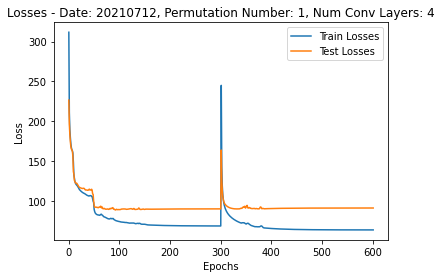

Date: 20210712, Initial LR: 0.00034299999999999993 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000343, Train Loss: 70.991508, Test Loss: 93.427994. Train R2: 0.5547883, Test R2: 0.3689303, Train pR2: -1.1755385, Test pR2: -1.4151752
Epoch: 050, LR: 0.000112, Train Loss: 60.268861, Test Loss: 92.839300. Train R2: 0.6008880, Test R2: 0.3704152, Train pR2: -1.1257180, Test pR2: -1.4391203
Epoch: 100, LR: 0.000037, Train Loss: 59.177503, Test Loss: 93.590708. Train R2: 0.6075261, Test R2: 0.3650515, Train pR2: -1.1247343, Test pR2: -1.4607066
Epoch: 150, LR: 0.000010, Train Loss: 58.839011, Test Loss: 93.821648. Train R2: 0.6095465, Test R2: 0.3633597, Train pR2: -1.1243658, Test pR2: -1.4671465
Epoch: 200, LR: 0.000003, Train Loss: 58.736922, Test Loss: 93.891683. Train R2: 0.6101646, Test R2: 0.3628427, Train pR2: -1.1242439, Test pR2: -1.4691610
Epoch: 250, LR: 0.000001, Train Loss: 58.705431, Test Loss: 93.913142. Train R2: 0.6103505, Test R2: 0.3626842, Train pR2: 

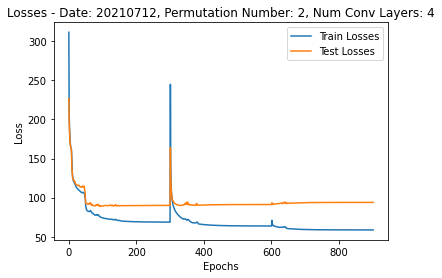

Date: 20220309, Initial LR: 0.00034299999999999993 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000343, Train Loss: 138.277867, Test Loss: 101.652935. Train R2: 0.0399347, Test R2: -0.0366303, Train pR2: -2.7624295, Test pR2: -2.6209142
Epoch: 050, LR: 0.000274, Train Loss: 47.911572, Test Loss: 64.390348. Train R2: 0.5570368, Test R2: 0.3233756, Train pR2: -0.1566170, Test pR2: -0.4020355
Epoch: 100, LR: 0.000072, Train Loss: 44.220057, Test Loss: 64.974962. Train R2: 0.5895541, Test R2: 0.3226669, Train pR2: -0.0898637, Test pR2: -0.3773239
Epoch: 150, LR: 0.000024, Train Loss: 43.323969, Test Loss: 65.510744. Train R2: 0.5970396, Test R2: 0.3195981, Train pR2: -0.0862280, Test pR2: -0.3926554
Epoch: 200, LR: 0.000006, Train Loss: 43.048295, Test Loss: 65.679491. Train R2: 0.5993307, Test R2: 0.3186208, Train pR2: -0.0844539, Test pR2: -0.3966126
Epoch: 250, LR: 0.000002, Train Loss: 42.962883, Test Loss: 65.741465. Train R2: 0.6000451, Test R2: 0.3182982, Train pR

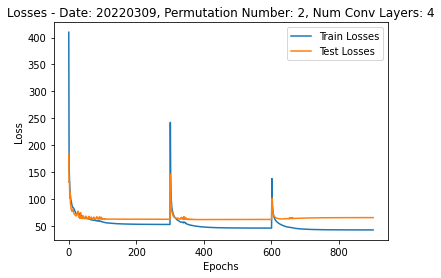

Date: 20211108, Initial LR: 0.00034299999999999993 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000343, Train Loss: 213.968637, Test Loss: 186.975426. Train R2: -0.0309912, Test R2: -0.2787958, Train pR2: -4.3347411, Test pR2: -4.8346496
Epoch: 050, LR: 0.000176, Train Loss: 56.140777, Test Loss: 155.924858. Train R2: 0.6405115, Test R2: -0.0341217, Train pR2: -0.7767912, Test pR2: -1.7993571
Epoch: 100, LR: 0.000046, Train Loss: 51.185088, Test Loss: 159.842842. Train R2: 0.6704312, Test R2: -0.0588416, Train pR2: -0.7560357, Test pR2: -1.8822275
Epoch: 150, LR: 0.000015, Train Loss: 49.919097, Test Loss: 161.023994. Train R2: 0.6781805, Test R2: -0.0663868, Train pR2: -0.7534921, Test pR2: -1.9141487
Epoch: 200, LR: 0.000004, Train Loss: 49.545319, Test Loss: 161.408150. Train R2: 0.6804546, Test R2: -0.0685443, Train pR2: -0.7530842, Test pR2: -1.9228393
Epoch: 250, LR: 0.000001, Train Loss: 49.430428, Test Loss: 161.529358. Train R2: 0.6811560, Test R2: -0.069207

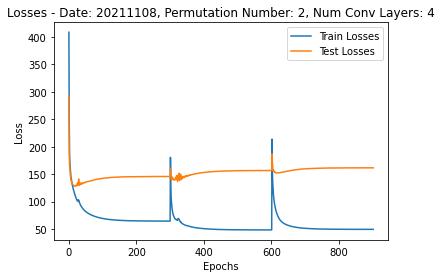

Date: 20210712, Initial LR: 0.00011764899999999994 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000118, Train Loss: 276.292603, Test Loss: 190.789586. Train R2: -0.2362102, Test R2: -0.2975832, Train pR2: -5.9229312, Test pR2: -6.3310785
Epoch: 050, LR: 0.000118, Train Loss: 64.462699, Test Loss: 92.887454. Train R2: 0.5743107, Test R2: 0.3680909, Train pR2: -0.8306802, Test pR2: -1.1224240
Epoch: 100, LR: 0.000031, Train Loss: 61.273949, Test Loss: 93.347699. Train R2: 0.5937585, Test R2: 0.3640653, Train pR2: -0.8079347, Test pR2: -1.1303849
Epoch: 150, LR: 0.000008, Train Loss: 60.594397, Test Loss: 93.578679. Train R2: 0.5979081, Test R2: 0.3624846, Train pR2: -0.8045651, Test pR2: -1.1362603
Epoch: 200, LR: 0.000003, Train Loss: 60.398784, Test Loss: 93.647484. Train R2: 0.5991170, Test R2: 0.3620196, Train pR2: -0.8037538, Test pR2: -1.1379886
Epoch: 250, LR: 0.000001, Train Loss: 60.337289, Test Loss: 93.671817. Train R2: 0.5994903, Test R2: 0.3618638, Train p

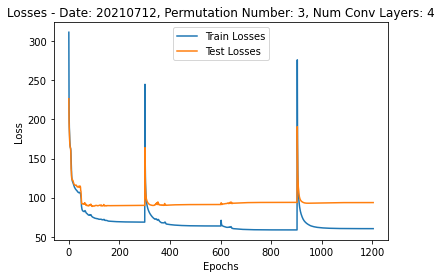

Date: 20211108, Initial LR: 0.00011764899999999994 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000118, Train Loss: 185.207275, Test Loss: 173.874374. Train R2: 0.0496406, Test R2: -0.2132619, Train pR2: -3.3018122, Test pR2: -3.9676991
Epoch: 050, LR: 0.000048, Train Loss: 51.631599, Test Loss: 153.852173. Train R2: 0.6675407, Test R2: -0.0474845, Train pR2: -0.7840958, Test pR2: -1.9155033
Epoch: 100, LR: 0.000016, Train Loss: 49.528860, Test Loss: 154.890663. Train R2: 0.6803103, Test R2: -0.0560830, Train pR2: -0.7737949, Test pR2: -1.9528570
Epoch: 150, LR: 0.000004, Train Loss: 48.981435, Test Loss: 155.324585. Train R2: 0.6836274, Test R2: -0.0592566, Train pR2: -0.7722560, Test pR2: -1.9650198
Epoch: 200, LR: 0.000001, Train Loss: 48.815516, Test Loss: 155.454765. Train R2: 0.6846413, Test R2: -0.0601999, Train pR2: -0.7720627, Test pR2: -1.9686139
Epoch: 250, LR: 0.000000, Train Loss: 48.764346, Test Loss: 155.496437. Train R2: 0.6849518, Test R2: -0.0605024

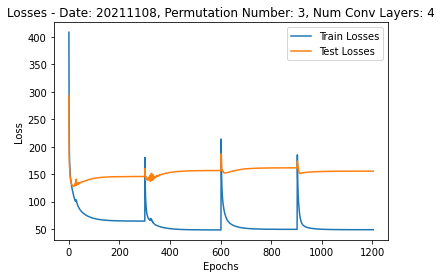

Date: 20220309, Initial LR: 0.00011764899999999994 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000118, Train Loss: 196.473767, Test Loss: 116.226265. Train R2: -0.1590444, Test R2: -0.2087276, Train pR2: -4.0200181, Test pR2: -3.6941204
Epoch: 050, LR: 0.000118, Train Loss: 47.872462, Test Loss: 63.637146. Train R2: 0.5567130, Test R2: 0.3059640, Train pR2: -0.0968267, Test pR2: -0.4021164
Epoch: 100, LR: 0.000048, Train Loss: 44.151717, Test Loss: 63.671675. Train R2: 0.5882962, Test R2: 0.3068437, Train pR2: -0.0454975, Test pR2: -0.3921348
Epoch: 150, LR: 0.000016, Train Loss: 43.303012, Test Loss: 63.765537. Train R2: 0.5955140, Test R2: 0.3058055, Train pR2: -0.0396752, Test pR2: -0.3982602
Epoch: 200, LR: 0.000004, Train Loss: 43.054321, Test Loss: 63.805706. Train R2: 0.5976093, Test R2: 0.3054119, Train pR2: -0.0373469, Test pR2: -0.4008474
Epoch: 250, LR: 0.000001, Train Loss: 42.976536, Test Loss: 63.826120. Train R2: 0.5982670, Test R2: 0.3052659, Train p

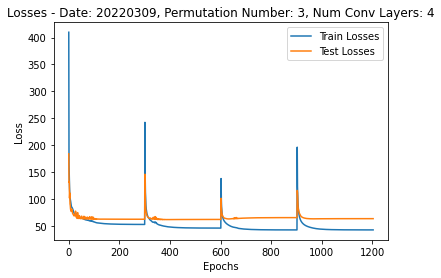

Date: 20211108, Initial LR: 2.824752489999998e-05 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000028, Train Loss: 133.994347, Test Loss: 162.320549. Train R2: 0.2505968, Test R2: -0.1360198, Train pR2: -2.1755800, Test pR2: -2.9541233
Epoch: 050, LR: 0.000009, Train Loss: 55.252919, Test Loss: 157.514580. Train R2: 0.6449512, Test R2: -0.0613511, Train pR2: -0.8383495, Test pR2: -1.9633186
Epoch: 100, LR: 0.000003, Train Loss: 52.867534, Test Loss: 157.207932. Train R2: 0.6593974, Test R2: -0.0620402, Train pR2: -0.8201787, Test pR2: -1.9968449
Epoch: 150, LR: 0.000001, Train Loss: 52.325509, Test Loss: 157.140823. Train R2: 0.6626700, Test R2: -0.0623552, Train pR2: -0.8166345, Test pR2: -2.0010390
Epoch: 200, LR: 0.000000, Train Loss: 52.169558, Test Loss: 157.127487. Train R2: 0.6636177, Test R2: -0.0624663, Train pR2: -0.8151914, Test pR2: -2.0026674
Epoch: 250, LR: 0.000000, Train Loss: 52.122084, Test Loss: 157.122208. Train R2: 0.6639047, Test R2: -0.0625029,

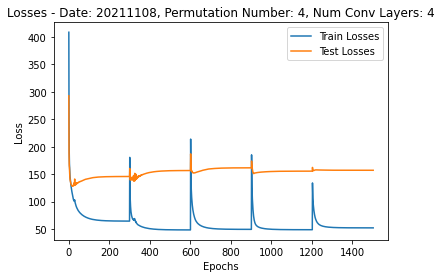

Date: 20220309, Initial LR: 2.824752489999998e-05 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000028, Train Loss: 110.893329, Test Loss: 87.937038. Train R2: 0.2169304, Test R2: 0.0566904, Train pR2: -1.7273797, Test pR2: -2.0032542
Epoch: 050, LR: 0.000028, Train Loss: 43.935287, Test Loss: 64.217819. Train R2: 0.5904537, Test R2: 0.2993325, Train pR2: -0.0413209, Test pR2: -0.4061817
Epoch: 100, LR: 0.000012, Train Loss: 42.535064, Test Loss: 64.289177. Train R2: 0.6021590, Test R2: 0.2976439, Train pR2: -0.0222139, Test pR2: -0.4108758
Epoch: 150, LR: 0.000003, Train Loss: 42.219647, Test Loss: 64.333036. Train R2: 0.6046953, Test R2: 0.2964629, Train pR2: -0.0200971, Test pR2: -0.4153069
Epoch: 200, LR: 0.000001, Train Loss: 42.125531, Test Loss: 64.347612. Train R2: 0.6054572, Test R2: 0.2961050, Train pR2: -0.0195889, Test pR2: -0.4164867
Epoch: 250, LR: 0.000000, Train Loss: 42.097063, Test Loss: 64.351801. Train R2: 0.6056914, Test R2: 0.2960001, Train pR2: 

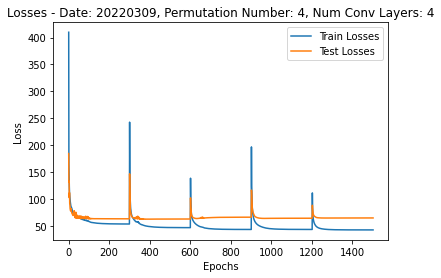

Date: 20210712, Initial LR: 2.824752489999998e-05 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000028, Train Loss: 134.355075, Test Loss: 129.803286. Train R2: 0.2316390, Test R2: 0.1223313, Train pR2: -1.9669971, Test pR2: -2.2311647
Epoch: 050, LR: 0.000028, Train Loss: 64.620490, Test Loss: 93.937986. Train R2: 0.5731865, Test R2: 0.3631292, Train pR2: -0.5962240, Test pR2: -0.9006450
Epoch: 100, LR: 0.000012, Train Loss: 61.738865, Test Loss: 93.913399. Train R2: 0.5909201, Test R2: 0.3619582, Train pR2: -0.5788460, Test pR2: -0.9130760
Epoch: 150, LR: 0.000004, Train Loss: 61.100673, Test Loss: 94.024859. Train R2: 0.5946713, Test R2: 0.3610255, Train pR2: -0.5736340, Test pR2: -0.9143227
Epoch: 200, LR: 0.000001, Train Loss: 60.917527, Test Loss: 94.056814. Train R2: 0.5957219, Test R2: 0.3607659, Train pR2: -0.5727525, Test pR2: -0.9150972
Epoch: 250, LR: 0.000000, Train Loss: 60.864169, Test Loss: 94.063629. Train R2: 0.5960347, Test R2: 0.3607020, Train pR2:

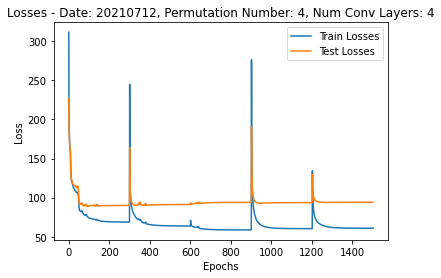

Date: 20211108, Initial LR: 4.747561509942995e-06 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000005, Train Loss: 148.931792, Test Loss: 165.590599. Train R2: 0.1664238, Test R2: -0.1627760, Train pR2: -2.0871480, Test pR2: -2.9200590
Epoch: 050, LR: 0.000002, Train Loss: 82.667705, Test Loss: 150.098869. Train R2: 0.4792249, Test R2: -0.0146789, Train pR2: -0.9068986, Test pR2: -1.6867372
Epoch: 100, LR: 0.000001, Train Loss: 78.377351, Test Loss: 150.757355. Train R2: 0.5036578, Test R2: -0.0200994, Train pR2: -0.8972198, Test pR2: -1.7416335
Epoch: 150, LR: 0.000000, Train Loss: 77.276477, Test Loss: 150.861115. Train R2: 0.5100194, Test R2: -0.0215665, Train pR2: -0.8954272, Test pR2: -1.7593075
Epoch: 200, LR: 0.000000, Train Loss: 76.954916, Test Loss: 150.893822. Train R2: 0.5118699, Test R2: -0.0219925, Train pR2: -0.8955234, Test pR2: -1.7651947
Epoch: 250, LR: 0.000000, Train Loss: 76.834188, Test Loss: 150.924065. Train R2: 0.5125769, Test R2: -0.0222077,

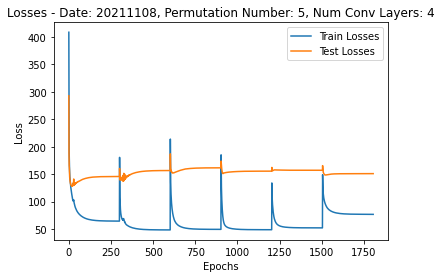

Date: 20210712, Initial LR: 4.747561509942995e-06 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000005, Train Loss: 77.597622, Test Loss: 102.274638. Train R2: 0.5162935, Test R2: 0.3002651, Train pR2: -0.8010178, Test pR2: -1.1540227
Epoch: 050, LR: 0.000003, Train Loss: 61.115114, Test Loss: 94.287165. Train R2: 0.5953038, Test R2: 0.3591444, Train pR2: -0.5811433, Test pR2: -0.9298793
Epoch: 100, LR: 0.000001, Train Loss: 60.723147, Test Loss: 94.410400. Train R2: 0.5971939, Test R2: 0.3582259, Train pR2: -0.5778516, Test pR2: -0.9298730
Epoch: 150, LR: 0.000000, Train Loss: 60.633326, Test Loss: 94.449356. Train R2: 0.5976234, Test R2: 0.3579387, Train pR2: -0.5773594, Test pR2: -0.9307370
Epoch: 200, LR: 0.000000, Train Loss: 60.605367, Test Loss: 94.460874. Train R2: 0.5977467, Test R2: 0.3578552, Train pR2: -0.5773144, Test pR2: -0.9308806
Epoch: 250, LR: 0.000000, Train Loss: 60.596893, Test Loss: 94.463285. Train R2: 0.5977878, Test R2: 0.3578370, Train pR2: 

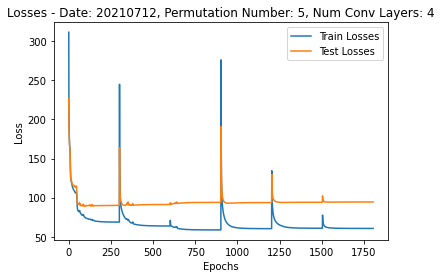

Date: 20220309, Initial LR: 4.747561509942995e-06 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000005, Train Loss: 91.642728, Test Loss: 91.103615. Train R2: 0.2550613, Test R2: 0.0334540, Train pR2: -1.8049399, Test pR2: -2.1423705
Epoch: 050, LR: 0.000005, Train Loss: 50.422254, Test Loss: 67.495457. Train R2: 0.5335505, Test R2: 0.2820309, Train pR2: -0.0960462, Test pR2: -0.3932714
Epoch: 100, LR: 0.000005, Train Loss: 47.299458, Test Loss: 66.659395. Train R2: 0.5604344, Test R2: 0.2883391, Train pR2: -0.0542735, Test pR2: -0.4085208
Epoch: 150, LR: 0.000001, Train Loss: 46.178698, Test Loss: 66.829525. Train R2: 0.5694217, Test R2: 0.2878244, Train pR2: -0.0457181, Test pR2: -0.4142555
Epoch: 200, LR: 0.000000, Train Loss: 45.899355, Test Loss: 66.883905. Train R2: 0.5717007, Test R2: 0.2876183, Train pR2: -0.0429990, Test pR2: -0.4178511
Epoch: 250, LR: 0.000000, Train Loss: 45.814448, Test Loss: 66.893261. Train R2: 0.5723861, Test R2: 0.2876093, Train pR2: -

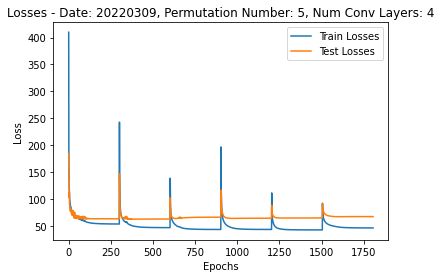

Date: 20220309, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.001000, Train Loss: 431.485126, Test Loss: 189.342857. Train R2: -0.9049048, Test R2: -0.9345538, Train pR2: -8.4130411, Test pR2: -7.7560410
Epoch: 050, LR: 0.000800, Train Loss: 66.719267, Test Loss: 76.809185. Train R2: 0.3863181, Test R2: 0.2509754, Train pR2: -2.3544881, Test pR2: -2.3877771
Epoch: 100, LR: 0.000210, Train Loss: 61.767361, Test Loss: 71.880314. Train R2: 0.4394774, Test R2: 0.2997069, Train pR2: -2.3209002, Test pR2: -2.3627365
Epoch: 150, LR: 0.000069, Train Loss: 60.481159, Test Loss: 72.288689. Train R2: 0.4502871, Test R2: 0.3003550, Train pR2: -2.3140228, Test pR2: -2.3641109
Epoch: 200, LR: 0.000018, Train Loss: 60.067861, Test Loss: 72.416653. Train R2: 0.4537420, Test R2: 0.3000464, Train pR2: -2.3119605, Test pR2: -2.3653252
Epoch: 250, LR: 0.000006, Train Loss: 59.936797, Test Loss: 72.428661. Train R2: 0.4548444, Test R2: 0.3000541, Train pR2: -2.3114126, T

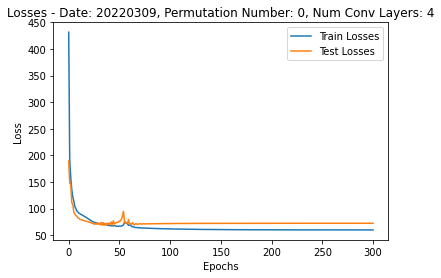

Date: 20210712, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.001000, Train Loss: 326.308595, Test Loss: 248.815481. Train R2: -0.6369267, Test R2: -0.6839725, Train pR2: -12.4118118, Test pR2: -12.7351866
Epoch: 050, LR: 0.001000, Train Loss: 103.268500, Test Loss: 111.992711. Train R2: 0.3173207, Test R2: 0.2371817, Train pR2: -4.1373272, Test pR2: -4.1277390
Epoch: 100, LR: 0.000512, Train Loss: 90.510413, Test Loss: 105.269216. Train R2: 0.4000938, Test R2: 0.2789133, Train pR2: -2.7708151, Test pR2: -2.8210156
Epoch: 150, LR: 0.000168, Train Loss: 86.791087, Test Loss: 104.959404. Train R2: 0.4228472, Test R2: 0.2792710, Train pR2: -2.7591913, Test pR2: -2.8388903
Epoch: 200, LR: 0.000069, Train Loss: 79.330488, Test Loss: 99.588076. Train R2: 0.4737350, Test R2: 0.3231884, Train pR2: -2.0996399, Test pR2: -2.2196238
Epoch: 250, LR: 0.000023, Train Loss: 78.811815, Test Loss: 99.726049. Train R2: 0.4769091, Test R2: 0.3223844, Train pR2: -2.0987

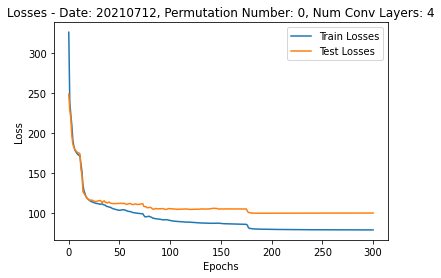

Date: 20211108, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.001000, Train Loss: 398.218024, Test Loss: 280.853958. Train R2: -0.7540899, Test R2: -0.8425405, Train pR2: -8.5430202, Test pR2: -8.6195974
Epoch: 050, LR: 0.000512, Train Loss: 81.468553, Test Loss: 126.154133. Train R2: 0.4893474, Test R2: 0.1299559, Train pR2: -1.0324712, Test pR2: -1.4642009
Epoch: 100, LR: 0.000134, Train Loss: 69.308401, Test Loss: 130.501816. Train R2: 0.5611017, Test R2: 0.1028100, Train pR2: -0.9637052, Test pR2: -1.5750684
Epoch: 150, LR: 0.000044, Train Loss: 66.158525, Test Loss: 132.231857. Train R2: 0.5798651, Test R2: 0.0932255, Train pR2: -0.9613348, Test pR2: -1.6249244
Epoch: 200, LR: 0.000012, Train Loss: 65.221589, Test Loss: 132.821316. Train R2: 0.5854331, Test R2: 0.0898883, Train pR2: -0.9613587, Test pR2: -1.6416001
Epoch: 250, LR: 0.000004, Train Loss: 64.941115, Test Loss: 133.002235. Train R2: 0.5871074, Test R2: 0.0888707, Train pR2: -0.96138

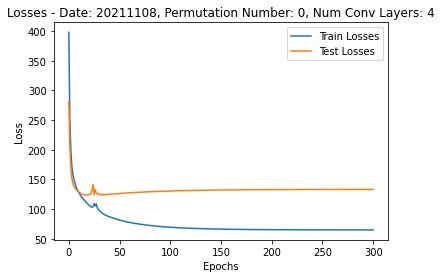

Date: 20220309, Initial LR: 0.0003 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000300, Train Loss: 358.841986, Test Loss: 164.726791. Train R2: -0.6782303, Test R2: -0.6209569, Train pR2: -6.2879257, Test pR2: -6.1153131
Epoch: 050, LR: 0.000240, Train Loss: 58.029666, Test Loss: 67.423946. Train R2: 0.4712012, Test R2: 0.3137049, Train pR2: -0.5693243, Test pR2: -0.6710753
Epoch: 100, LR: 0.000079, Train Loss: 53.220612, Test Loss: 67.692184. Train R2: 0.5117558, Test R2: 0.3181676, Train pR2: -0.5285564, Test pR2: -0.6646636
Epoch: 150, LR: 0.000026, Train Loss: 52.003168, Test Loss: 67.748165. Train R2: 0.5220633, Test R2: 0.3183403, Train pR2: -0.5221766, Test pR2: -0.6718168
Epoch: 200, LR: 0.000007, Train Loss: 51.630868, Test Loss: 67.807159. Train R2: 0.5251905, Test R2: 0.3181943, Train pR2: -0.5203789, Test pR2: -0.6743402
Epoch: 250, LR: 0.000002, Train Loss: 51.516735, Test Loss: 67.816818. Train R2: 0.5261531, Test R2: 0.3181657, Train pR2: -0.5197049, 

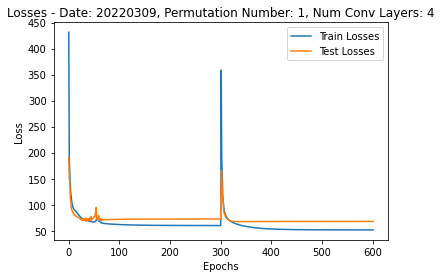

Date: 20211108, Initial LR: 0.0003 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000300, Train Loss: 144.110809, Test Loss: 147.057892. Train R2: 0.2986519, Test R2: -0.0298753, Train pR2: -2.2662659, Test pR2: -2.7935703
Epoch: 050, LR: 0.000123, Train Loss: 59.683565, Test Loss: 137.817230. Train R2: 0.6198702, Test R2: 0.0576526, Train pR2: -1.0386318, Test pR2: -1.8584343
Epoch: 100, LR: 0.000040, Train Loss: 56.476997, Test Loss: 140.543144. Train R2: 0.6389916, Test R2: 0.0427289, Train pR2: -1.0320517, Test pR2: -1.9327567
Epoch: 150, LR: 0.000011, Train Loss: 55.541853, Test Loss: 141.366783. Train R2: 0.6445334, Test R2: 0.0381587, Train pR2: -1.0318195, Test pR2: -1.9563652
Epoch: 200, LR: 0.000003, Train Loss: 55.257617, Test Loss: 141.615387. Train R2: 0.6462267, Test R2: 0.0367429, Train pR2: -1.0319136, Test pR2: -1.9639404
Epoch: 250, LR: 0.000001, Train Loss: 55.172892, Test Loss: 141.693855. Train R2: 0.6467354, Test R2: 0.0363026, Train pR2: -1.03220

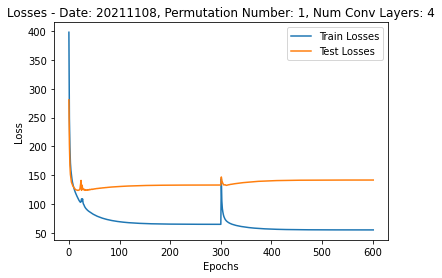

Date: 20210712, Initial LR: 0.0003 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000300, Train Loss: 248.405204, Test Loss: 169.834997. Train R2: -0.1329649, Test R2: -0.1538919, Train pR2: -4.9883456, Test pR2: -5.0819850
Epoch: 050, LR: 0.000300, Train Loss: 74.152634, Test Loss: 90.983658. Train R2: 0.5114224, Test R2: 0.3842094, Train pR2: -0.8555334, Test pR2: -1.0121189
Epoch: 100, LR: 0.000098, Train Loss: 68.495776, Test Loss: 91.167465. Train R2: 0.5465692, Test R2: 0.3831052, Train pR2: -0.8273255, Test pR2: -1.0293703
Epoch: 150, LR: 0.000032, Train Loss: 67.065751, Test Loss: 91.627187. Train R2: 0.5554041, Test R2: 0.3801442, Train pR2: -0.8219418, Test pR2: -1.0393832
Epoch: 200, LR: 0.000008, Train Loss: 66.634272, Test Loss: 91.793287. Train R2: 0.5580025, Test R2: 0.3791287, Train pR2: -0.8207938, Test pR2: -1.0435617
Epoch: 250, LR: 0.000003, Train Loss: 66.503009, Test Loss: 91.846642. Train R2: 0.5588049, Test R2: 0.3787902, Train pR2: -0.8202738, 

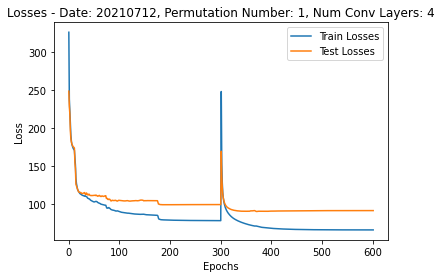

Date: 20210712, Initial LR: 2.6999999999999996e-05 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000027, Train Loss: 68.032508, Test Loss: 93.162064. Train R2: 0.5526423, Test R2: 0.3700428, Train pR2: -0.8700601, Test pR2: -1.1039929
Epoch: 050, LR: 0.000009, Train Loss: 65.287410, Test Loss: 92.742294. Train R2: 0.5673643, Test R2: 0.3724296, Train pR2: -0.8179968, Test pR2: -1.0678198
Epoch: 100, LR: 0.000003, Train Loss: 64.947473, Test Loss: 92.948720. Train R2: 0.5692358, Test R2: 0.3709857, Train pR2: -0.8172675, Test pR2: -1.0735054
Epoch: 150, LR: 0.000001, Train Loss: 64.849219, Test Loss: 93.010849. Train R2: 0.5697553, Test R2: 0.3705574, Train pR2: -0.8173463, Test pR2: -1.0758113
Epoch: 200, LR: 0.000000, Train Loss: 64.821904, Test Loss: 93.028804. Train R2: 0.5699041, Test R2: 0.3704315, Train pR2: -0.8173999, Test pR2: -1.0763596
Epoch: 250, LR: 0.000000, Train Loss: 64.813612, Test Loss: 93.033943. Train R2: 0.5699473, Test R2: 0.3703956, Train pR2: 

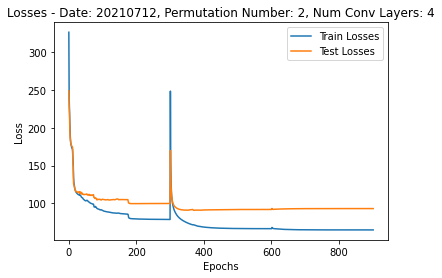

Date: 20220309, Initial LR: 2.6999999999999996e-05 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000027, Train Loss: 118.485971, Test Loss: 88.606419. Train R2: 0.1093736, Test R2: 0.0660163, Train pR2: -2.4109695, Test pR2: -2.4213328
Epoch: 050, LR: 0.000027, Train Loss: 57.742683, Test Loss: 66.827225. Train R2: 0.4716949, Test R2: 0.3053693, Train pR2: -0.4806592, Test pR2: -0.6155719
Epoch: 100, LR: 0.000017, Train Loss: 53.376084, Test Loss: 66.376841. Train R2: 0.5083926, Test R2: 0.3086722, Train pR2: -0.4321702, Test pR2: -0.6088281
Epoch: 150, LR: 0.000006, Train Loss: 52.132769, Test Loss: 66.508614. Train R2: 0.5186474, Test R2: 0.3073608, Train pR2: -0.4212914, Test pR2: -0.6155510
Epoch: 200, LR: 0.000001, Train Loss: 51.790781, Test Loss: 66.573805. Train R2: 0.5214408, Test R2: 0.3068578, Train pR2: -0.4192407, Test pR2: -0.6177732
Epoch: 250, LR: 0.000000, Train Loss: 51.689207, Test Loss: 66.594072. Train R2: 0.5222769, Test R2: 0.3066992, Train pR2:

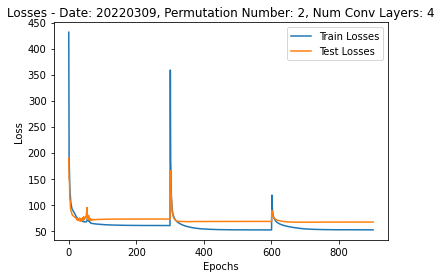

Date: 20211108, Initial LR: 2.6999999999999996e-05 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000027, Train Loss: 200.552902, Test Loss: 182.034424. Train R2: -0.0835650, Test R2: -0.2539689, Train pR2: -3.9406846, Test pR2: -4.3599806
Epoch: 050, LR: 0.000027, Train Loss: 79.062522, Test Loss: 136.374641. Train R2: 0.5015286, Test R2: 0.0784063, Train pR2: -0.7721325, Test pR2: -1.4197375
Epoch: 100, LR: 0.000009, Train Loss: 70.881877, Test Loss: 137.878983. Train R2: 0.5495614, Test R2: 0.0681388, Train pR2: -0.7232214, Test pR2: -1.4739974
Epoch: 150, LR: 0.000002, Train Loss: 69.179319, Test Loss: 138.530273. Train R2: 0.5595481, Test R2: 0.0648561, Train pR2: -0.7145637, Test pR2: -1.4896280
Epoch: 200, LR: 0.000001, Train Loss: 68.703024, Test Loss: 138.736526. Train R2: 0.5623620, Test R2: 0.0638264, Train pR2: -0.7121832, Test pR2: -1.4957582
Epoch: 250, LR: 0.000000, Train Loss: 68.562023, Test Loss: 138.795227. Train R2: 0.5631898, Test R2: 0.0635479, Tr

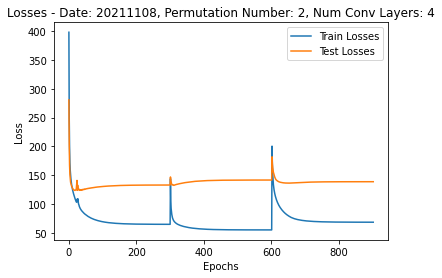

Date: 20210712, Initial LR: 7.289999999999998e-07 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000001, Train Loss: 183.817013, Test Loss: 161.891301. Train R2: 0.0169959, Test R2: -0.1073608, Train pR2: -3.4058185, Test pR2: -3.8004997
Epoch: 050, LR: 0.000001, Train Loss: 86.042903, Test Loss: 98.635643. Train R2: 0.4322424, Test R2: 0.3317822, Train pR2: -1.0464984, Test pR2: -1.2009275
Epoch: 100, LR: 0.000001, Train Loss: 82.568868, Test Loss: 96.369680. Train R2: 0.4550454, Test R2: 0.3464997, Train pR2: -0.9346213, Test pR2: -1.1073518
Epoch: 150, LR: 0.000001, Train Loss: 80.862350, Test Loss: 95.649198. Train R2: 0.4662778, Test R2: 0.3509139, Train pR2: -0.9239876, Test pR2: -1.1054763
Epoch: 200, LR: 0.000001, Train Loss: 79.588186, Test Loss: 95.240883. Train R2: 0.4746524, Test R2: 0.3532421, Train pR2: -0.9190010, Test pR2: -1.1064901
Epoch: 250, LR: 0.000001, Train Loss: 78.470225, Test Loss: 94.908106. Train R2: 0.4819934, Test R2: 0.3550112, Train pR2

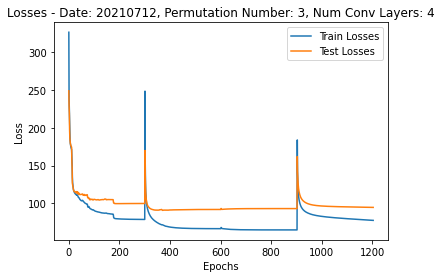

Date: 20211108, Initial LR: 7.289999999999998e-07 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000001, Train Loss: 79.281180, Test Loss: 136.426193. Train R2: 0.5128381, Test R2: 0.0602515, Train pR2: -0.7692075, Test pR2: -1.4550573
Epoch: 050, LR: 0.000000, Train Loss: 70.992545, Test Loss: 137.198837. Train R2: 0.5488650, Test R2: 0.0688019, Train pR2: -0.7153813, Test pR2: -1.4772056
Epoch: 100, LR: 0.000000, Train Loss: 70.465240, Test Loss: 137.574783. Train R2: 0.5517199, Test R2: 0.0663636, Train pR2: -0.7164611, Test pR2: -1.4960068
Epoch: 150, LR: 0.000000, Train Loss: 70.309601, Test Loss: 137.692398. Train R2: 0.5525530, Test R2: 0.0656184, Train pR2: -0.7175012, Test pR2: -1.5026062
Epoch: 200, LR: 0.000000, Train Loss: 70.218642, Test Loss: 137.786407. Train R2: 0.5530728, Test R2: 0.0651242, Train pR2: -0.7182711, Test pR2: -1.5059862
Epoch: 250, LR: 0.000000, Train Loss: 70.143411, Test Loss: 137.882248. Train R2: 0.5535135, Test R2: 0.0646758, Train 

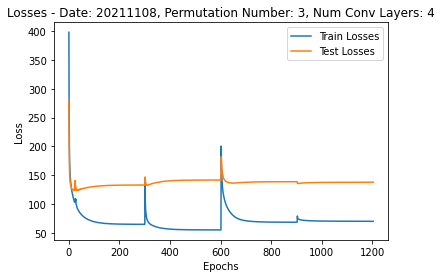

Date: 20220309, Initial LR: 7.289999999999998e-07 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000001, Train Loss: 103.940059, Test Loss: 93.934269. Train R2: 0.1921920, Test R2: 0.0428559, Train pR2: -2.1848536, Test pR2: -2.5707486
Epoch: 050, LR: 0.000001, Train Loss: 58.563196, Test Loss: 70.600048. Train R2: 0.4633767, Test R2: 0.2724481, Train pR2: -0.5455832, Test pR2: -0.7456134
Epoch: 100, LR: 0.000001, Train Loss: 56.564948, Test Loss: 69.074940. Train R2: 0.4802671, Test R2: 0.2853656, Train pR2: -0.5031357, Test pR2: -0.7072754
Epoch: 150, LR: 0.000001, Train Loss: 55.627734, Test Loss: 68.712145. Train R2: 0.4881816, Test R2: 0.2893951, Train pR2: -0.4883728, Test pR2: -0.7014861
Epoch: 200, LR: 0.000000, Train Loss: 54.962280, Test Loss: 68.655928. Train R2: 0.4932748, Test R2: 0.2910966, Train pR2: -0.4719970, Test pR2: -0.6860829
Epoch: 250, LR: 0.000000, Train Loss: 54.696629, Test Loss: 68.657852. Train R2: 0.4949519, Test R2: 0.2915630, Train pR2: 

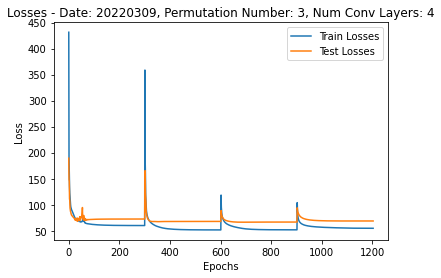

Date: 20211108, Initial LR: 5.9048999999999985e-09 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000000, Train Loss: 73.998889, Test Loss: 139.742561. Train R2: 0.5334123, Test R2: 0.0530726, Train pR2: -0.8198346, Test pR2: -1.5876203
Epoch: 050, LR: 0.000000, Train Loss: 70.957355, Test Loss: 138.313004. Train R2: 0.5488717, Test R2: 0.0628549, Train pR2: -0.7251173, Test pR2: -1.5168972
Epoch: 100, LR: 0.000000, Train Loss: 70.791785, Test Loss: 138.459778. Train R2: 0.5495338, Test R2: 0.0618739, Train pR2: -0.7273780, Test pR2: -1.5279955
Epoch: 150, LR: 0.000000, Train Loss: 70.739074, Test Loss: 138.510712. Train R2: 0.5497687, Test R2: 0.0615496, Train pR2: -0.7282098, Test pR2: -1.5327014
Epoch: 200, LR: 0.000000, Train Loss: 70.713728, Test Loss: 138.535767. Train R2: 0.5498914, Test R2: 0.0614066, Train pR2: -0.7285317, Test pR2: -1.5341169
Epoch: 250, LR: 0.000000, Train Loss: 70.697170, Test Loss: 138.554680. Train R2: 0.5499824, Test R2: 0.0613093, Train

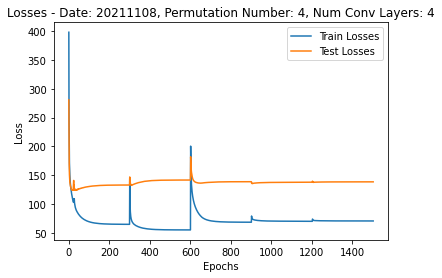

Date: 20220309, Initial LR: 5.9048999999999985e-09 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000000, Train Loss: 57.957687, Test Loss: 72.600800. Train R2: 0.4671005, Test R2: 0.2585739, Train pR2: -0.7566752, Test pR2: -1.0422635
Epoch: 050, LR: 0.000000, Train Loss: 54.561109, Test Loss: 68.741131. Train R2: 0.4963823, Test R2: 0.2913610, Train pR2: -0.4676045, Test pR2: -0.6917997
Epoch: 100, LR: 0.000000, Train Loss: 54.472599, Test Loss: 68.756470. Train R2: 0.4967517, Test R2: 0.2913172, Train pR2: -0.4667064, Test pR2: -0.6905708
Epoch: 150, LR: 0.000000, Train Loss: 54.446695, Test Loss: 68.760380. Train R2: 0.4968729, Test R2: 0.2913012, Train pR2: -0.4664668, Test pR2: -0.6902983
Epoch: 200, LR: 0.000000, Train Loss: 54.436504, Test Loss: 68.760738. Train R2: 0.4969248, Test R2: 0.2913055, Train pR2: -0.4664359, Test pR2: -0.6901760
Epoch: 250, LR: 0.000000, Train Loss: 54.431958, Test Loss: 68.760258. Train R2: 0.4969558, Test R2: 0.2913130, Train pR2: 

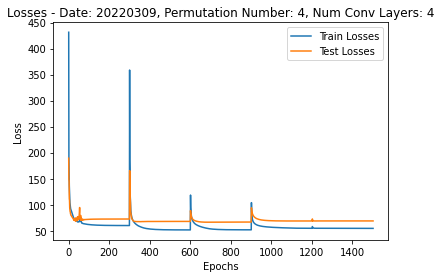

Date: 20210712, Initial LR: 5.9048999999999985e-09 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000000, Train Loss: 79.712088, Test Loss: 95.961021. Train R2: 0.4778625, Test R2: 0.3473915, Train pR2: -1.0588220, Test pR2: -1.2711097
Epoch: 050, LR: 0.000000, Train Loss: 77.156130, Test Loss: 94.465825. Train R2: 0.4893402, Test R2: 0.3579333, Train pR2: -1.0002325, Test pR2: -1.1970216
Epoch: 100, LR: 0.000000, Train Loss: 76.948203, Test Loss: 94.453067. Train R2: 0.4898955, Test R2: 0.3580421, Train pR2: -0.9989163, Test pR2: -1.1959844
Epoch: 150, LR: 0.000000, Train Loss: 76.896619, Test Loss: 94.452334. Train R2: 0.4900494, Test R2: 0.3580410, Train pR2: -0.9986405, Test pR2: -1.1959853
Epoch: 200, LR: 0.000000, Train Loss: 76.874257, Test Loss: 94.450066. Train R2: 0.4901284, Test R2: 0.3580507, Train pR2: -0.9985734, Test pR2: -1.1961191
Epoch: 250, LR: 0.000000, Train Loss: 76.862918, Test Loss: 94.446912. Train R2: 0.4901866, Test R2: 0.3580665, Train pR2: 

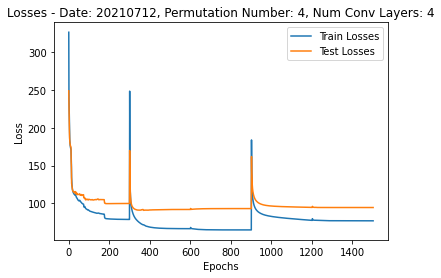

Date: 20211108, Initial LR: 1.4348906999999994e-11 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000000, Train Loss: 73.253831, Test Loss: 141.243332. Train R2: 0.5360239, Test R2: 0.0453663, Train pR2: -0.8860627, Test pR2: -1.7204157
Epoch: 050, LR: 0.000000, Train Loss: 70.609550, Test Loss: 138.895248. Train R2: 0.5508031, Test R2: 0.0589365, Train pR2: -0.7371706, Test pR2: -1.5611187
Epoch: 100, LR: 0.000000, Train Loss: 70.509008, Test Loss: 138.969978. Train R2: 0.5511055, Test R2: 0.0583754, Train pR2: -0.7379384, Test pR2: -1.5682247
Epoch: 150, LR: 0.000000, Train Loss: 70.482506, Test Loss: 138.996414. Train R2: 0.5511903, Test R2: 0.0582009, Train pR2: -0.7381664, Test pR2: -1.5701399
Epoch: 200, LR: 0.000000, Train Loss: 70.473961, Test Loss: 139.003197. Train R2: 0.5512147, Test R2: 0.0581526, Train pR2: -0.7382836, Test pR2: -1.5704768
Epoch: 250, LR: 0.000000, Train Loss: 70.471542, Test Loss: 139.005287. Train R2: 0.5512219, Test R2: 0.0581381, Train

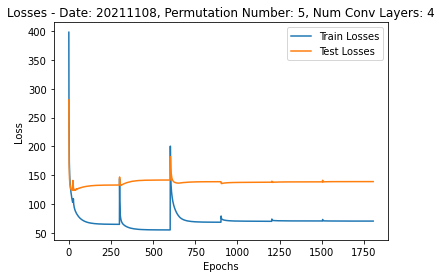

Date: 20210712, Initial LR: 1.4348906999999994e-11 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000000, Train Loss: 79.326013, Test Loss: 96.264577. Train R2: 0.4788788, Test R2: 0.3445131, Train pR2: -1.0435122, Test pR2: -1.2550770
Epoch: 050, LR: 0.000000, Train Loss: 76.960403, Test Loss: 94.531886. Train R2: 0.4906486, Test R2: 0.3573517, Train pR2: -0.9990847, Test pR2: -1.1996729
Epoch: 100, LR: 0.000000, Train Loss: 76.785493, Test Loss: 94.522125. Train R2: 0.4909724, Test R2: 0.3574592, Train pR2: -0.9991293, Test pR2: -1.1999501
Epoch: 150, LR: 0.000000, Train Loss: 76.748483, Test Loss: 94.525304. Train R2: 0.4910313, Test R2: 0.3574425, Train pR2: -0.9990641, Test pR2: -1.2001028
Epoch: 200, LR: 0.000000, Train Loss: 76.735594, Test Loss: 94.526560. Train R2: 0.4910473, Test R2: 0.3574357, Train pR2: -0.9990556, Test pR2: -1.2002140
Epoch: 250, LR: 0.000000, Train Loss: 76.732060, Test Loss: 94.526942. Train R2: 0.4910520, Test R2: 0.3574336, Train pR2: 

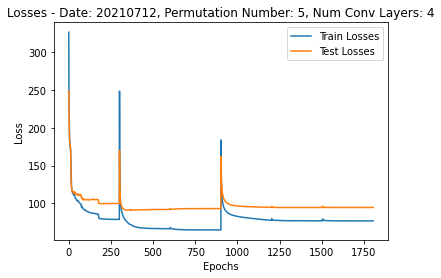

Date: 20220309, Initial LR: 1.4348906999999994e-11 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000000, Train Loss: 57.719409, Test Loss: 72.694485. Train R2: 0.4689763, Test R2: 0.2584179, Train pR2: -0.7455075, Test pR2: -1.0338296
Epoch: 050, LR: 0.000000, Train Loss: 54.397527, Test Loss: 68.846729. Train R2: 0.4977451, Test R2: 0.2909748, Train pR2: -0.4601583, Test pR2: -0.6894647
Epoch: 100, LR: 0.000000, Train Loss: 54.323235, Test Loss: 68.863445. Train R2: 0.4979942, Test R2: 0.2908958, Train pR2: -0.4594646, Test pR2: -0.6887093
Epoch: 150, LR: 0.000000, Train Loss: 54.303202, Test Loss: 68.868782. Train R2: 0.4980649, Test R2: 0.2908611, Train pR2: -0.4592967, Test pR2: -0.6884163
Epoch: 200, LR: 0.000000, Train Loss: 54.296482, Test Loss: 68.870056. Train R2: 0.4980862, Test R2: 0.2908529, Train pR2: -0.4592697, Test pR2: -0.6882136
Epoch: 250, LR: 0.000000, Train Loss: 54.294686, Test Loss: 68.870449. Train R2: 0.4980926, Test R2: 0.2908503, Train pR2: 

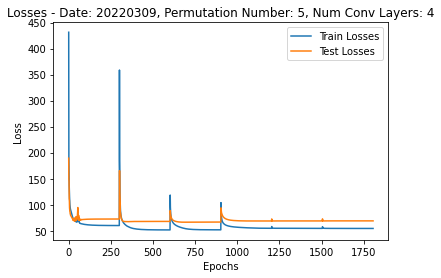

Date: 20220309, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.001000, Train Loss: 411.136093, Test Loss: 181.979095. Train R2: -0.7030041, Test R2: -0.8046459, Train pR2: -19.5896893, Test pR2: -23.2937927
Epoch: 050, LR: 0.000800, Train Loss: 64.564915, Test Loss: 65.892239. Train R2: 0.4272436, Test R2: 0.3039514, Train pR2: -0.7867188, Test pR2: -0.7811658
Epoch: 100, LR: 0.000410, Train Loss: 57.726413, Test Loss: 63.988239. Train R2: 0.4781143, Test R2: 0.3212291, Train pR2: -0.7541011, Test pR2: -0.7783997
Epoch: 150, LR: 0.000107, Train Loss: 55.502057, Test Loss: 63.943140. Train R2: 0.4954851, Test R2: 0.3203041, Train pR2: -0.7409765, Test pR2: -0.7793403
Epoch: 200, LR: 0.000035, Train Loss: 54.884773, Test Loss: 63.862312. Train R2: 0.5006908, Test R2: 0.3207481, Train pR2: -0.7374237, Test pR2: -0.7804810
Epoch: 250, LR: 0.000009, Train Loss: 54.686327, Test Loss: 63.847214. Train R2: 0.5023427, Test R2: 0.3209241, Train pR2: -0.7362081,

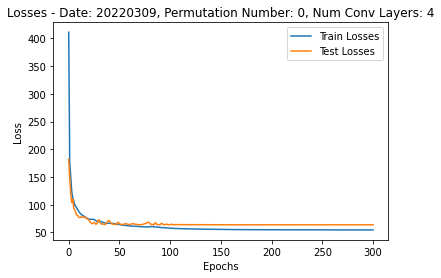

Date: 20210712, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.001000, Train Loss: 314.846815, Test Loss: 215.618856. Train R2: -0.4375205, Test R2: -0.4678385, Train pR2: -10.0539789, Test pR2: -10.2377796
Epoch: 050, LR: 0.001000, Train Loss: 107.744735, Test Loss: 117.820679. Train R2: 0.2883204, Test R2: 0.2223004, Train pR2: -3.0840037, Test pR2: -3.1821492
Epoch: 100, LR: 0.000512, Train Loss: 95.851682, Test Loss: 111.386139. Train R2: 0.3748331, Test R2: 0.2668166, Train pR2: -1.9073491, Test pR2: -1.9880221
Epoch: 150, LR: 0.000168, Train Loss: 88.445523, Test Loss: 110.163226. Train R2: 0.4147733, Test R2: 0.2770357, Train pR2: -1.8322406, Test pR2: -1.9636267


KeyboardInterrupt: ignored

In [ ]:
lr_factors = [0.7,0.3,0.1]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

losses = {'All Losses': {},'By Dataset': {}}
models = {}

for lr_factor in lr_factors:
    init_lr = 0.001
    losses['All Losses'][lr_factor] = {'Train': [], 'Test': []}
    losses['By Dataset'][lr_factor] = {'Train': {'20220309': [], '20210712': [], '20211108': []},\
                                       'Test': {'20220309': [], '20210712': [], '20211108': []}}

    output_dim = tcnn_dataset_dict['20220309']['Joint Angles']['Full'].num_neural_units
    model = TempConvNet(24, output_dim, 4, 1, 5, 2, add_relu = True, causal=True).to(device)

    # get randomly initialized linear layers
    linear_layers = {}
    for date in tcnn_dataset_dict.keys():
        output_dim = tcnn_dataset_dict[date]['Joint Angles']['Full'].num_neural_units
        m = TempConvNet(24, output_dim, 4, 1, 5, 2, add_relu = True, causal=True).to(device)
        linear_layers[date] = m.net[-2]

    for perm_num, perm in enumerate(all_dataset_permutations):
        for i, date in enumerate(perm):
            model.net[-2] = linear_layers[date]

            train_loader, test_loader, full_dataset = \
                tcnn_loader_dict[date]['Joint Angles']['Train'], \
                tcnn_loader_dict[date]['Joint Angles']['Test'], \
                tcnn_dataset_dict[date]['Joint Angles']['Full']

            lr = init_lr
            criterion = torch.nn.MSELoss()
            optimizer = torch.optim.Adam([
                {'params': model.net[0].parameters(), 'lr': lr},
                {'params': model.net[2].parameters(), 'lr': lr},
                {'params': model.net[4].parameters(), 'lr': lr},
                {'params': model.net[6].parameters(), 'lr': lr},
                {'params': model.net[8].parameters(), 'lr': 0.001}])
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.8, patience=8, min_lr=0.0)   
            total_params = sum(p.numel() for p in model.parameters())

            print('Date: {}, Initial LR: {} '.format(date,lr))
            print('Num Conv Layers: {}, Total Parameters: {}'\
                .format(model.num_conv_layers, total_params))

            start = time.time()
            for epoch in range(301):
                lr = scheduler.optimizer.param_groups[0]['lr']
                train_loss = train_test.train(train_loader, model, optimizer, criterion, scheduler, conv = True)
                _, train_R2, train_pr2, train_preds, train_targets = train_test.test(train_loader, model, optimizer, criterion, full_dataset.num_neural_units, conv = True)
                test_loss, test_R2, test_pr2, test_preds, test_targets = train_test.test(test_loader, model, optimizer, criterion, full_dataset.num_neural_units, conv = True)
                scheduler.step(test_loss)
                if epoch % 50==0:
                  print('Epoch: {:03d}, LR: {:7f}, Train Loss: {:7f}, Test Loss: {:7f}. Train R2: {:.7f}, Test R2: {:.7f}, Train pR2: {:.7f}, Test pR2: {:.7f}'\
                      .format(epoch, lr, train_loss, test_loss, train_R2, test_R2, train_pr2, test_pr2))

                losses['All Losses'][lr_factor]['Train'].append(train_loss)
                losses['All Losses'][lr_factor]['Test'].append(test_loss)
                losses['By Dataset'][lr_factor]['Train'][date].append(train_loss)
                losses['By Dataset'][lr_factor]['Test'][date].append(test_loss)

            end = time.time()
            print('Time to train model: {}'.format(end-start))
            plt.plot(losses['By Dataset'][lr_factor]['Train'][date])
            plt.plot(losses['By Dataset'][lr_factor]['Test'][date])
            plt.title('Losses - Date: {}, Permutation Number: {}, Num Conv Layers: {}'.format(date, perm_num, model.num_conv_layers))
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend(['Train Losses', 'Test Losses'])
            plt.show()

            # replace linear layer with trained
            linear_layers[date] = model.net[-2]

        # update learning rate by factor of lr_factor
        init_lr *= (lr_factor**(perm_num+1))

    models[lr_factor] = model
    model_name = str(lr_factor)
    model_save_dir = '/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/TransferLearning/{}'.format(model_name)
    torch.save(model.state_dict(), model_save_dir)
#             if (perm_num == (len(subset_permutations)-1)):
#                 train_instance_data = get_instance_losses(train_dataset, model)
#                 test_instance_data = get_instance_losses(test_dataset, model)
#                 instance_data = [train_instance_data, test_instance_data]

#                 r2_train = sklearn.metrics.r2_score(train_instance_data[2],train_instance_data[3],multioutput='variance_weighted')
#                 r2_test = sklearn.metrics.r2_score(test_instance_data[2],test_instance_data[3],multioutput='variance_weighted')
#                 r2_values[lr_factor]['Train'][j+16] = r2_train
#                 r2_values[lr_factor]['Test'][j+16] = r2_test

#                 # save model
#                 parent_directory = '/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/TransferLearningPart3/'
#                 lr_fol = str(lr_factor)+'learningrate/'
#                 session = str(j+16)
#                 model_save_dir = parent_directory+lr_fol+session+'model_weights.pth'
#                 torch.save(model.state_dict(), model_save_dir)

#             # update learning rate by factor of lr_factor
#             lr = 0.01*(lr_factor**(i+1))
#             #put update linear layer into list of linear layers
#             linear_layers[j] = model.net[-1]

# with open(parent_directory+'r2_values.json', 'w') as f:
#     json.dump(r2_values, f, indent=2)
# with open(parent_directory+'losses.json', 'w') as f:
#     json.dump(losses, f, indent=2) 

In [ ]:
linear_layers = {}

{'20220309': Linear(in_features=384, out_features=96, bias=True), '20210712': Linear(in_features=384, out_features=142, bias=True), '20211108': Linear(in_features=384, out_features=93, bias=True)}
Linear(in_features=384, out_features=96, bias=True)
TempConvNet(
  (net): ModuleList(
    (0): Conv1d(24, 48, kernel_size=(5,), stride=(1,))
    (1): ReLU()
    (2): Conv1d(48, 96, kernel_size=(5,), stride=(1,))
    (3): ReLU()
    (4): Conv1d(96, 192, kernel_size=(5,), stride=(1,))
    (5): ReLU()
    (6): Conv1d(192, 384, kernel_size=(5,), stride=(1,))
    (7): ReLU()
    (8): Linear(in_features=384, out_features=96, bias=True)
    (9): ReLU()
  )
)
Date: 20220309, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 527280
Epoch: 000, LR: 0.000000, Train Loss: 403.513104, Test Loss: 250.930450. Train R2: -1.5929639, Test R2: -1.5824959, Train pR2: -22.9497738, Test pR2: -24.0491180
Epoch: 050, LR: 0.000000, Train Loss: 58.529246, Test Loss: 69.213451. Train R2: 0.4639886, Test R2: 0.26

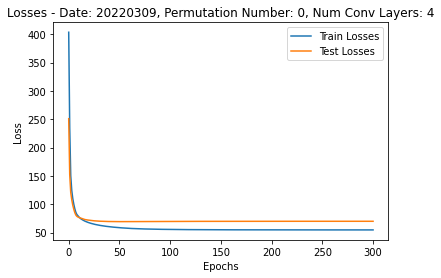

Linear(in_features=384, out_features=142, bias=True)
TempConvNet(
  (net): ModuleList(
    (0): Conv1d(24, 48, kernel_size=(5,), stride=(1,))
    (1): ReLU()
    (2): Conv1d(48, 96, kernel_size=(5,), stride=(1,))
    (3): ReLU()
    (4): Conv1d(96, 192, kernel_size=(5,), stride=(1,))
    (5): ReLU()
    (6): Conv1d(192, 384, kernel_size=(5,), stride=(1,))
    (7): ReLU()
    (8): Linear(in_features=384, out_features=96, bias=True)
    (9): ReLU()
  )
)
Date: 20210712, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 544990
Epoch: 000, LR: 0.000000, Train Loss: 362.213335, Test Loss: 238.786621. Train R2: -0.5501323, Test R2: -0.6214921, Train pR2: -4.3223472, Test pR2: -4.4507599
Epoch: 050, LR: 0.000000, Train Loss: 70.468824, Test Loss: 91.512009. Train R2: 0.5341285, Test R2: 0.3810203, Train pR2: -0.6709358, Test pR2: -0.9022284
Epoch: 100, LR: 0.000000, Train Loss: 67.911235, Test Loss: 91.853279. Train R2: 0.5498538, Test R2: 0.3782999, Train pR2: -0.4904345, Test pR2: -0

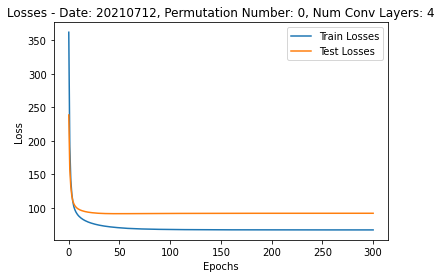

Linear(in_features=384, out_features=93, bias=True)
TempConvNet(
  (net): ModuleList(
    (0): Conv1d(24, 48, kernel_size=(5,), stride=(1,))
    (1): ReLU()
    (2): Conv1d(48, 96, kernel_size=(5,), stride=(1,))
    (3): ReLU()
    (4): Conv1d(96, 192, kernel_size=(5,), stride=(1,))
    (5): ReLU()
    (6): Conv1d(192, 384, kernel_size=(5,), stride=(1,))
    (7): ReLU()
    (8): Linear(in_features=384, out_features=142, bias=True)
    (9): ReLU()
  )
)
Date: 20211108, Initial LR: 0.001 
Num Conv Layers: 4, Total Parameters: 526125
Epoch: 000, LR: 0.000000, Train Loss: 384.463245, Test Loss: 300.429916. Train R2: -0.8694342, Test R2: -0.9756751, Train pR2: -9.7473679, Test pR2: -10.0508108
Epoch: 050, LR: 0.000000, Train Loss: 97.617804, Test Loss: 141.837082. Train R2: 0.3921124, Test R2: 0.0326570, Train pR2: -2.5860631, Test pR2: -3.0939629
Epoch: 100, LR: 0.000000, Train Loss: 92.161182, Test Loss: 142.561813. Train R2: 0.4222349, Test R2: 0.0268843, Train pR2: -2.2884383, Test pR2:

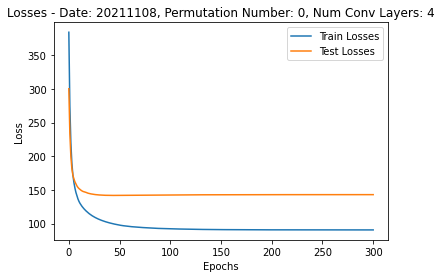

In [ ]:
lr_factors = [1]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

losses = {'All Losses': {},'By Dataset': {}}
linear_layers_perm = {}

for lr_factor in lr_factors:
    init_lr = 0.001
    losses['All Losses'][lr_factor] = {'Train': [], 'Test': []}
    losses['By Dataset'][lr_factor] = {'Train': {'20220309': [], '20210712': [], '20211108': []},\
                                       'Test': {'20220309': [], '20210712': [], '20211108': []}}

    output_dim = tcnn_dataset_dict['20220309']['Joint Angles']['Full'].num_neural_units
    model = TempConvNet(24, tcnn_dataset_dict['20220309']['Joint Angles']['Full'].num_neural_units, 4, 1, 5, 2, add_relu = True, causal=True)
    model.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/TransferLearning/0.7'))

    # get randomly initialized linear layers
    linear_layers = {}
    for date in tcnn_dataset_dict.keys():
        output_dim = tcnn_dataset_dict[date]['Joint Angles']['Full'].num_neural_units
        m = TempConvNet(24, output_dim, 4, 1, 5, 2, add_relu = True, causal=True).to(device)
        linear_layers[date] = m.net[-2]
    print(linear_layers)

    for perm_num, perm in enumerate(all_dataset_permutations[:1]):
        for i, date in enumerate(perm):
            print(linear_layers[date])
            print(model)
            model.net[-2] = linear_layers[date]

            train_loader, test_loader, full_dataset = \
                tcnn_loader_dict[date]['Joint Angles']['Train'], \
                tcnn_loader_dict[date]['Joint Angles']['Test'], \
                tcnn_dataset_dict[date]['Joint Angles']['Full']

            lr = init_lr
            criterion = torch.nn.MSELoss()
            optimizer = torch.optim.Adam([
                {'params': model.net[0].parameters(), 'lr': 0},
                {'params': model.net[2].parameters(), 'lr': 0},
                {'params': model.net[4].parameters(), 'lr': 0},
                {'params': model.net[6].parameters(), 'lr': 0},
                {'params': model.net[8].parameters(), 'lr': 0.001}])
            scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.8, patience=8, min_lr=0.0)   
            total_params = sum(p.numel() for p in model.parameters())

            print('Date: {}, Initial LR: {} '.format(date,lr))
            print('Num Conv Layers: {}, Total Parameters: {}'\
                .format(model.num_conv_layers, total_params))

            start = time.time()
            for epoch in range(301):
                lr = scheduler.optimizer.param_groups[0]['lr']
                train_loss = train_test.train(train_loader, model, optimizer, criterion, scheduler, conv = True)
                _, train_R2, train_pr2, train_preds, train_targets = train_test.test(train_loader, model, optimizer, criterion, full_dataset.num_neural_units, conv = True)
                test_loss, test_R2, test_pr2, test_preds, test_targets = train_test.test(test_loader, model, optimizer, criterion, full_dataset.num_neural_units, conv = True)
                scheduler.step(test_loss)
                if epoch % 50==0:
                  print('Epoch: {:03d}, LR: {:7f}, Train Loss: {:7f}, Test Loss: {:7f}. Train R2: {:.7f}, Test R2: {:.7f}, Train pR2: {:.7f}, Test pR2: {:.7f}'\
                      .format(epoch, lr, train_loss, test_loss, train_R2, test_R2, train_pr2, test_pr2))

                losses['All Losses'][lr_factor]['Train'].append(train_loss)
                losses['All Losses'][lr_factor]['Test'].append(test_loss)
                losses['By Dataset'][lr_factor]['Train'][date].append(train_loss)
                losses['By Dataset'][lr_factor]['Test'][date].append(test_loss)

            end = time.time()
            print('Time to train model: {}'.format(end-start))
            plt.plot(losses['By Dataset'][lr_factor]['Train'][date])
            plt.plot(losses['By Dataset'][lr_factor]['Test'][date])
            plt.title('Losses - Date: {}, Permutation Number: {}, Num Conv Layers: {}'.format(date, perm_num, model.num_conv_layers))
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.legend(['Train Losses', 'Test Losses'])
            plt.show()

            model_name = str(lr_factor)
            model_save_dir = '/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/TransferLearning/{}_{}'.format(model_name,date)
            torch.save(model.state_dict(), model_save_dir)

            # replace linear layer with trained
            linear_layers[date] = model.net[-2]

        # update learning rate by factor of lr_factor
        init_lr *= (lr_factor**(perm_num+1))

    # models[lr_factor] = model
    # model_name = str(lr_factor)
    # model_save_dir = '/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/TransferLearning/{}'.format(model_name)
    # torch.save(model.state_dict(), model_save_dir)

In [ ]:
tl_model_20220309 = TempConvNet(24, tcnn_dataset_dict['20220309']['Joint Angles']['Full'].num_neural_units, 4, 1, 5, 2, add_relu = True, causal=True)
tl_model_20220309.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/TransferLearning/07/20220309'))
tl_model_20210712 = TempConvNet(24, tcnn_dataset_dict['20210712']['Joint Angles']['Full'].num_neural_units, 4, 1, 5, 2, add_relu = True, causal=True)
tl_model_20210712.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/TransferLearning/07/20210712'))
tl_model_20211108 = TempConvNet(24, tcnn_dataset_dict['20211108']['Joint Angles']['Full'].num_neural_units, 4, 1, 5, 2, add_relu = True, causal=True)
tl_model_20211108.load_state_dict(torch.load('/content/drive/My Drive/Miller_Lab/FIU/Temporal_CNN/Pop_FR_OpenSIM/TransferLearning/07/20211108'))

<All keys matched successfully>

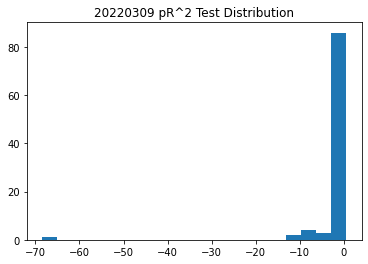

In [ ]:
pr2_20220309 = visualization.plot_pr2(tl_model_20220309,tcnn_dataset_dict['20220309']['Joint Angles']['Full'],tcnn_loader_dict['20220309']['Joint Angles']['Test'])

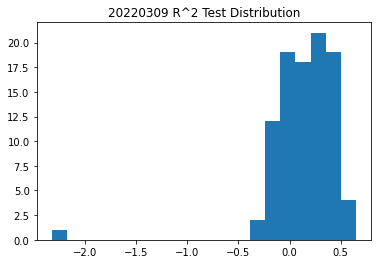

In [ ]:
r2_20220309 = visualization.plot_r2(tl_model_20220309,tcnn_dataset_dict['20220309']['Joint Angles']['Full'],tcnn_loader_dict['20220309']['Joint Angles']['Test'])

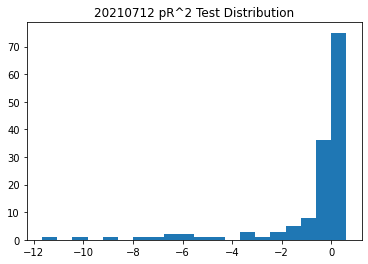

In [ ]:
pr2_20210712 = visualization.plot_pr2(tl_model_20210712,tcnn_dataset_dict['20210712']['Joint Angles']['Full'],tcnn_loader_dict['20210712']['Joint Angles']['Test'])

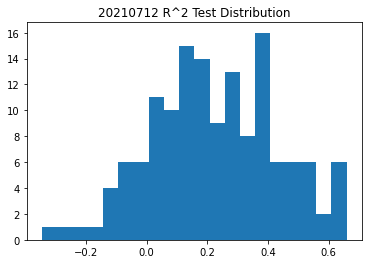

In [ ]:
pr2_20210712 = visualization.plot_r2(tl_model_20210712,tcnn_dataset_dict['20210712']['Joint Angles']['Full'],tcnn_loader_dict['20210712']['Joint Angles']['Test'])

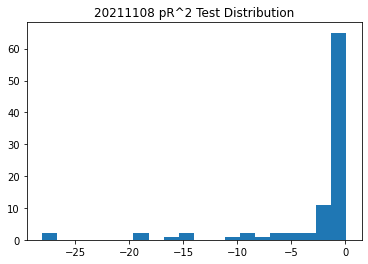

In [ ]:
pr2_20211108 = visualization.plot_pr2(tl_model_20211108,tcnn_dataset_dict['20211108']['Joint Angles']['Full'],tcnn_loader_dict['20211108']['Joint Angles']['Test'])

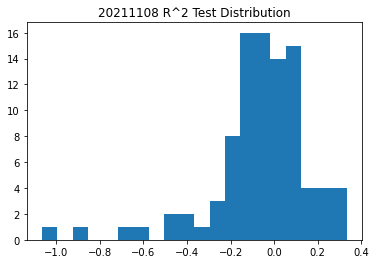

In [ ]:
pr2_20211108 = visualization.plot_r2(tl_model_20211108,tcnn_dataset_dict['20211108']['Joint Angles']['Full'],tcnn_loader_dict['20211108']['Joint Angles']['Test'])

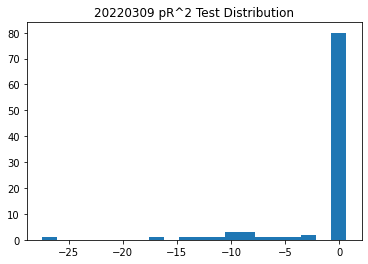

In [ ]:
pr2_20220309 = visualization.plot_pr2(cnn_4convlayers_add_relu_0309,tcnn_dataset_dict['20220309']['Joint Angles']['Full'],tcnn_loader_dict['20220309']['Joint Angles']['Test'])

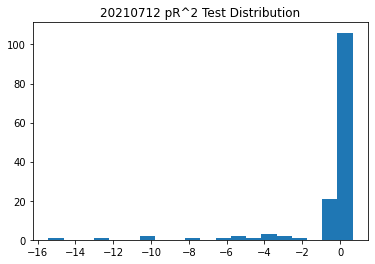

In [ ]:
pr2_20210712 = visualization.plot_pr2(cnn_4convlayers_add_relu_0712,tcnn_dataset_dict['20210712']['Joint Angles']['Full'],tcnn_loader_dict['20210712']['Joint Angles']['Test'])

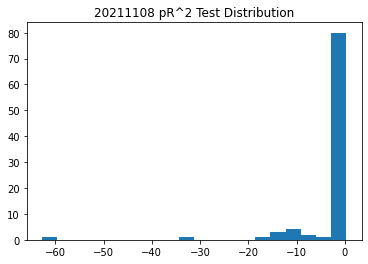

In [ ]:
pr2_20211108 = visualization.plot_pr2(cnn_4convlayers_add_relu_1108,tcnn_dataset_dict['20211108']['Joint Angles']['Full'],tcnn_loader_dict['20211108']['Joint Angles']['Test'])